# 7.2 Different ways to build Keras models

- 3 APIs for building Keras models:
  1. *Sequential model*: most approachable, basically a Python list. But limited to simple stacks of layers.
  2. *Functional API*: graph-like model architectures, nice mid-point between usability and flexibility. Most commonly used model-building API.
  2. *Model subclassing*: low-level, write everything yourself from scratch. Ideal if you want full control, won't get access to many built-in Keras features, and more at risk of making mistakes.
  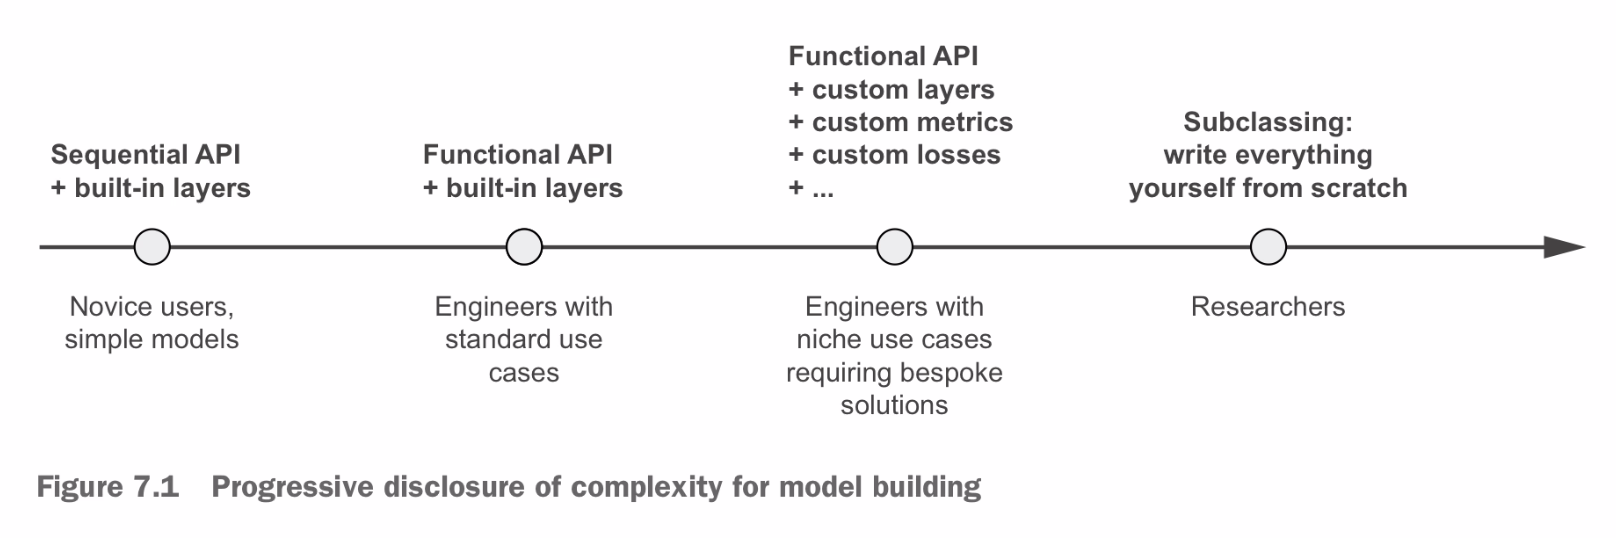

## 7.2.1 The Sequential model

Simplest way to build a Keras model

### The `Sequential` class

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

### Another way to do this: incrementally building a Sequential model using `add()` method

In [3]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [4]:
model.weights   # layers only create their weights when called for the first time
                # b/c layers' shape depends on input shape

[]

### No weights until you actually call it on some data → call its `build()` method with an input shape:

Calling a model first time to build it:

In [5]:
model.build(input_shape=(None, 3)) # builds the model, expecting samples of shape (3,). None signals that the batch size could be anything
model.weights # now we can retrieve the model's weights

[<KerasVariable shape=(3, 64), dtype=float32, path=sequential_1/dense_2/kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=sequential_1/dense_2/bias>,
 <KerasVariable shape=(64, 10), dtype=float32, path=sequential_1/dense_3/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential_1/dense_3/bias>]

After model is built, we can display the contents via the `summary()`method, very handy for debugging:

In [6]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

We can give names to models and layers too!

In [7]:
model = keras.Sequential(name="o1_baby")
model.add(layers.Dense(64, activation="relu", name="o1_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="o1_last_layer"))
model.build((None, 3))
model.summary()

Model: "o1_baby"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ o1_first_layer (Dense)               │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ o1_last_layer (Dense)                │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

- It's useful to print a summary when building a sequential model incrementally to keep up with the model at each increment.
- But you can only print when the model is built.
- Workaround: declare the shape of the model's inputs in advance, like:

In [8]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,))) # Input declares the shape of inputs
                                  # Shape argument = shape of EACH SAMPLE
                                  # NOT shape of one batch
model.add(layers.Dense(64, activation="relu"))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │             256 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 256 (1.00 KB)

 Trainable params: 256 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

This is really helpful in debugging especially when dealing with layers that transform their inputs in complex ways like convolutional layers.

## 7.2.2 The Functional API

- Sequential model is easy, but its applications are limited.
  - Only express models with single input and output, applying 1 layer after another in a sequential form.
  - We might have models with multiple inputs, or a nonlinear topology.
- In such cases, we'd need Functional API.
- Most Keras models we'll encounter use this.


### A simple Functional model with 2 `Dense` layers

In [10]:
# stack of 2 layers from the previous example in functional API form:

inputs = keras.Input(shape=(3,), name="my_input") # called a SYMBOLIC TENSOR (no actual data but encodes info. about the coming data)
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [11]:
print(inputs.shape)
print(inputs.dtype)
print(features.shape)
model.summary()


(None, 3)
float32
(None, 64)


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ my_input (InputLayer)                │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

---

Most DL models do not look like this—they look like graphs.

Let's build a model to rank customer support tickets by priority and route them to the appropriate departments.

Inputs:
* Title (text input)
* Text body (text input)
* Tags added by user (categorical input, one-hot enoded)

Outputs:
* Priority score of ticket between 0 and 1 (sigmoid output)
* Department to be routed to (softmax over set of departments)

Let's build this.

### A multi-input, multi-output Functional model

In [12]:
vocab_size = 10000 # encode text inputs as arrays of ones and zeros
num_tags = 100
num_depts = 4

# define the model inputs
title = keras.Input(shape=(vocab_size,), name="title")
text_body = keras.Input(shape=(vocab_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

# combine the input features into a single tensor
features= layers.Concatenate()([title, text_body, tags])

# apply an intermediate layer to recombine input features into richer representations
features = layers.Dense(64, activation="relu") (features)

# define the model outputs
priority = layers.Dense(1, activation="sigmoid", name="priority") (features)
dept = layers.Dense(num_depts, activation="softmax", name="dept") (features)

# create the model by specifying the inputs and outputs
model = keras.Model(inputs=[title, text_body, tags],
                    outputs=[priority, dept])


### Training a multi-input, multi-output model by providing lists of input and target arrays

Can train the model in much the same way as the Sequential model by calling the `fit()` method with lists of input and output arrays.

> These lists of data should be in the same order as the inputs you passed to the `Model` constructor.

In [13]:
import numpy as np

In [14]:
num_samples = 1280

# dummy input data
title_data = np.random.randint(0, 2, size=(num_samples, vocab_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocab_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

# dummy target data
priority_data = np.random.random(size=(num_samples, 1))
dept_data = np.random.randint(0, 2, size=(num_samples, num_depts))

In [15]:
# compiling
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, dept_data], epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
          [priority_data, dept_data])
priority_predictions, dept_predictions = model.predict([title_data, text_body_data, tags_data])

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - dept_accuracy: 0.2554 - dept_loss: 30.3992 - loss: 30.7013 - priority_loss: 0.3021 - priority_mean_absolute_error: 0.4665
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - dept_accuracy: 0.5807 - dept_loss: 14.1204 - loss: 14.4544 - priority_loss: 0.3341 - priority_mean_absolute_error: 0.4997
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


### Training a model by providing dicts of inputs and target arrays

We can use this when we do not want to rely on the input order like above in cases when we have too many inputs or outputs.

```python
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "dept": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "dept": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "dept": dept_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data}, {"priority": priority_data, "dept": dept_data})

priority_predictions, dept_predictions = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})
```

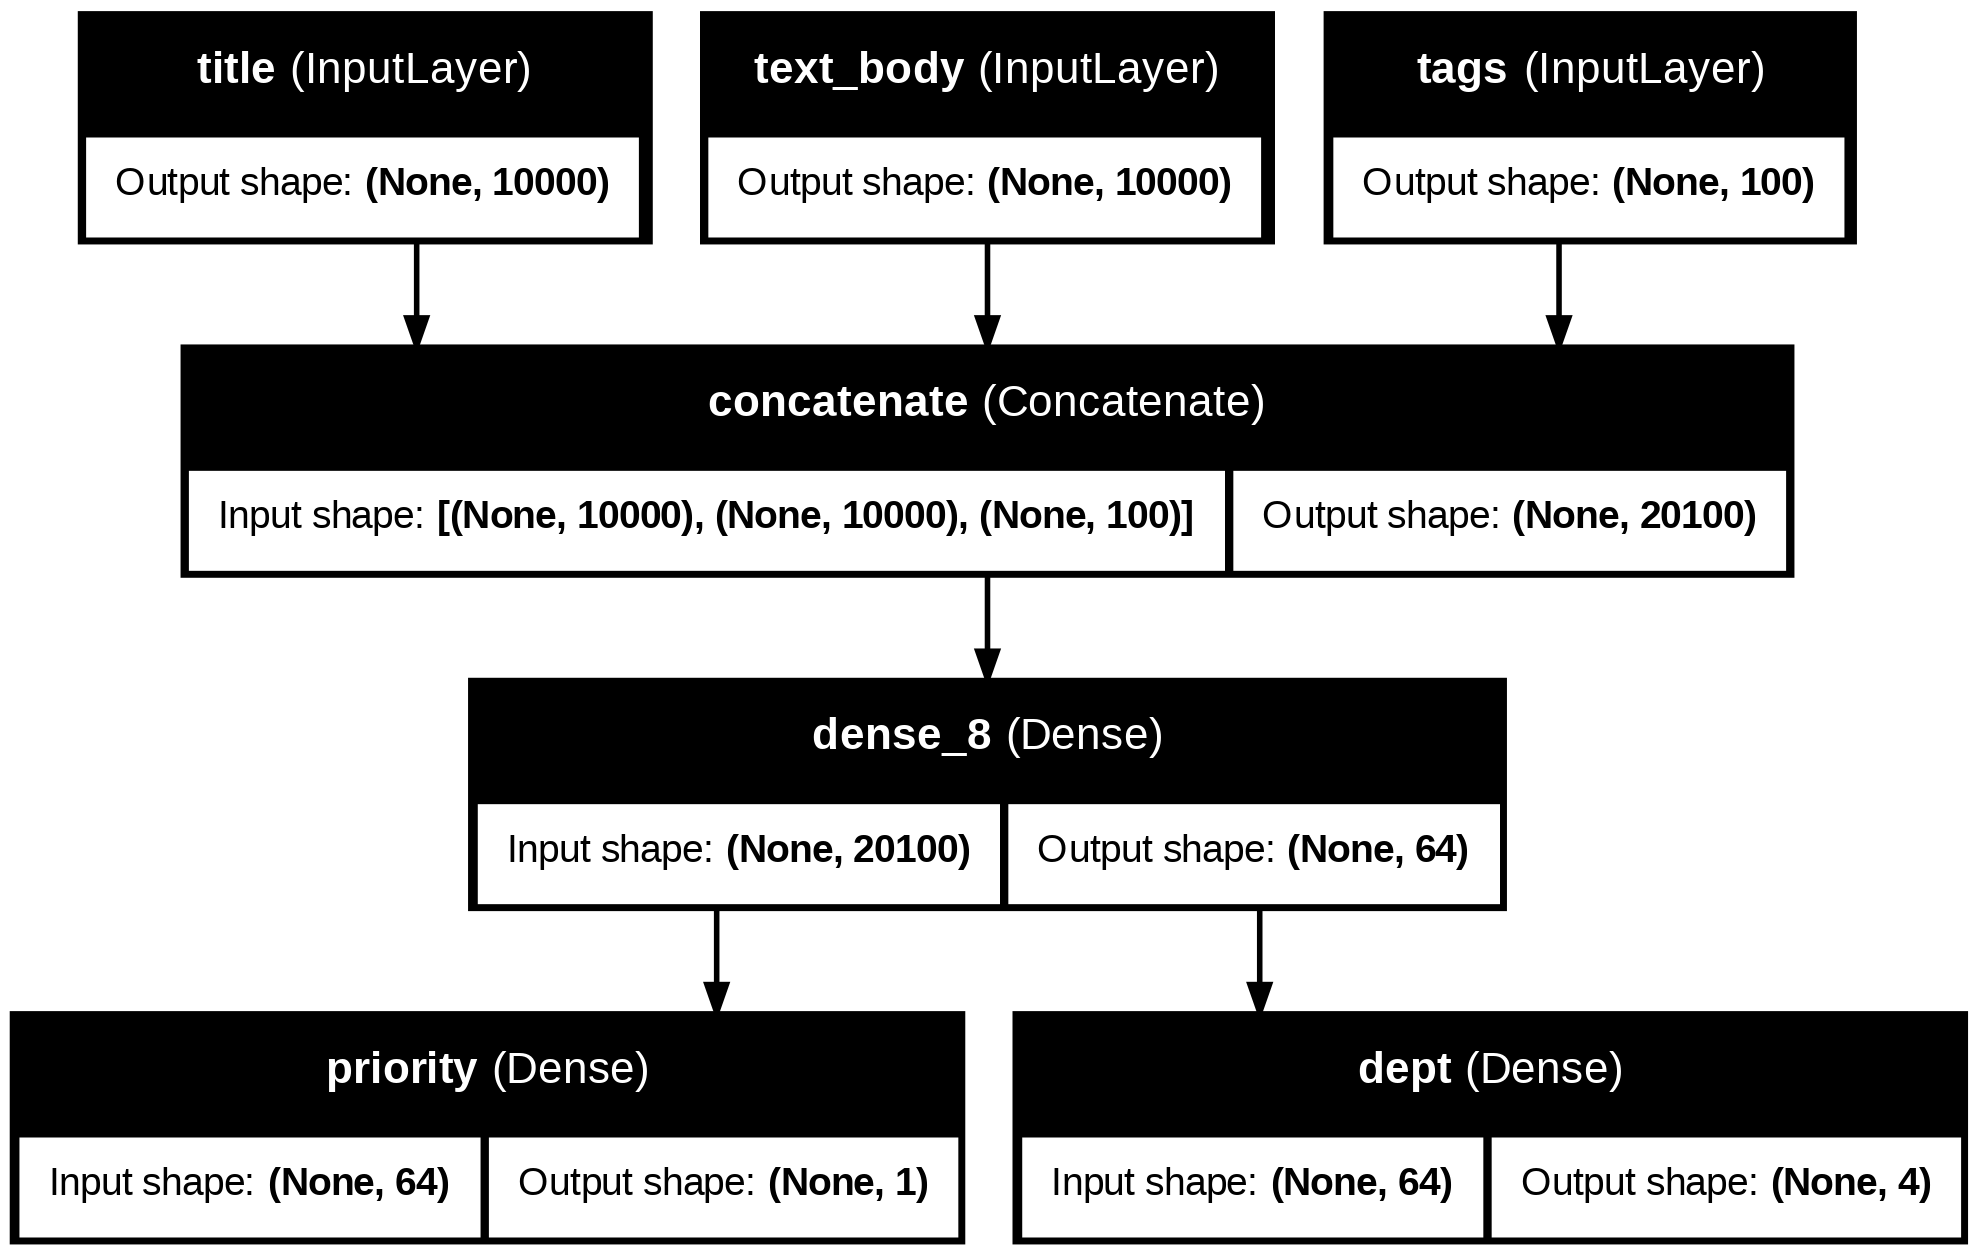

In [16]:
keras.utils.plot_model(model, "ticket_classifier.png", show_shapes=True, show_layer_names=True)

You can inspect and reuse individual nodes (layer calls) in the graph.

In [17]:
model.layers

[<InputLayer name=title, built=True>,
 <InputLayer name=text_body, built=True>,
 <InputLayer name=tags, built=True>,
 <Concatenate name=concatenate, built=True>,
 <Dense name=dense_8, built=True>,
 <Dense name=priority, built=True>,
 <Dense name=dept, built=True>]

In [18]:
model.layers[3].input

[<KerasTensor shape=(None, 10000), dtype=float32, sparse=False, name=title>,
 <KerasTensor shape=(None, 10000), dtype=float32, sparse=False, name=text_body>,
 <KerasTensor shape=(None, 100), dtype=float32, sparse=False, name=tags>]

In [19]:
model.layers[3].output

<KerasTensor shape=(None, 20100), dtype=float32, sparse=False, name=keras_tensor_12>

This enables you to do feature extraction, creating models that reuse intermediate features from another model.


Let's add another output: difficulty (how long it'll take to resolve). A classification layer, 3 categories: "quick", "medium", "difficult".

### Creating a new model by reusing intermediate layer outputs

In [20]:
features = model.layers[4].output # layers[4] is the intermediate Dense layer
difficulty = layers.Dense(3, activation="softmax", name="difficulty") (features)

new_model = keras.Model(inputs=[title, text_body, tags],
                        outputs=[priority, dept, difficulty])


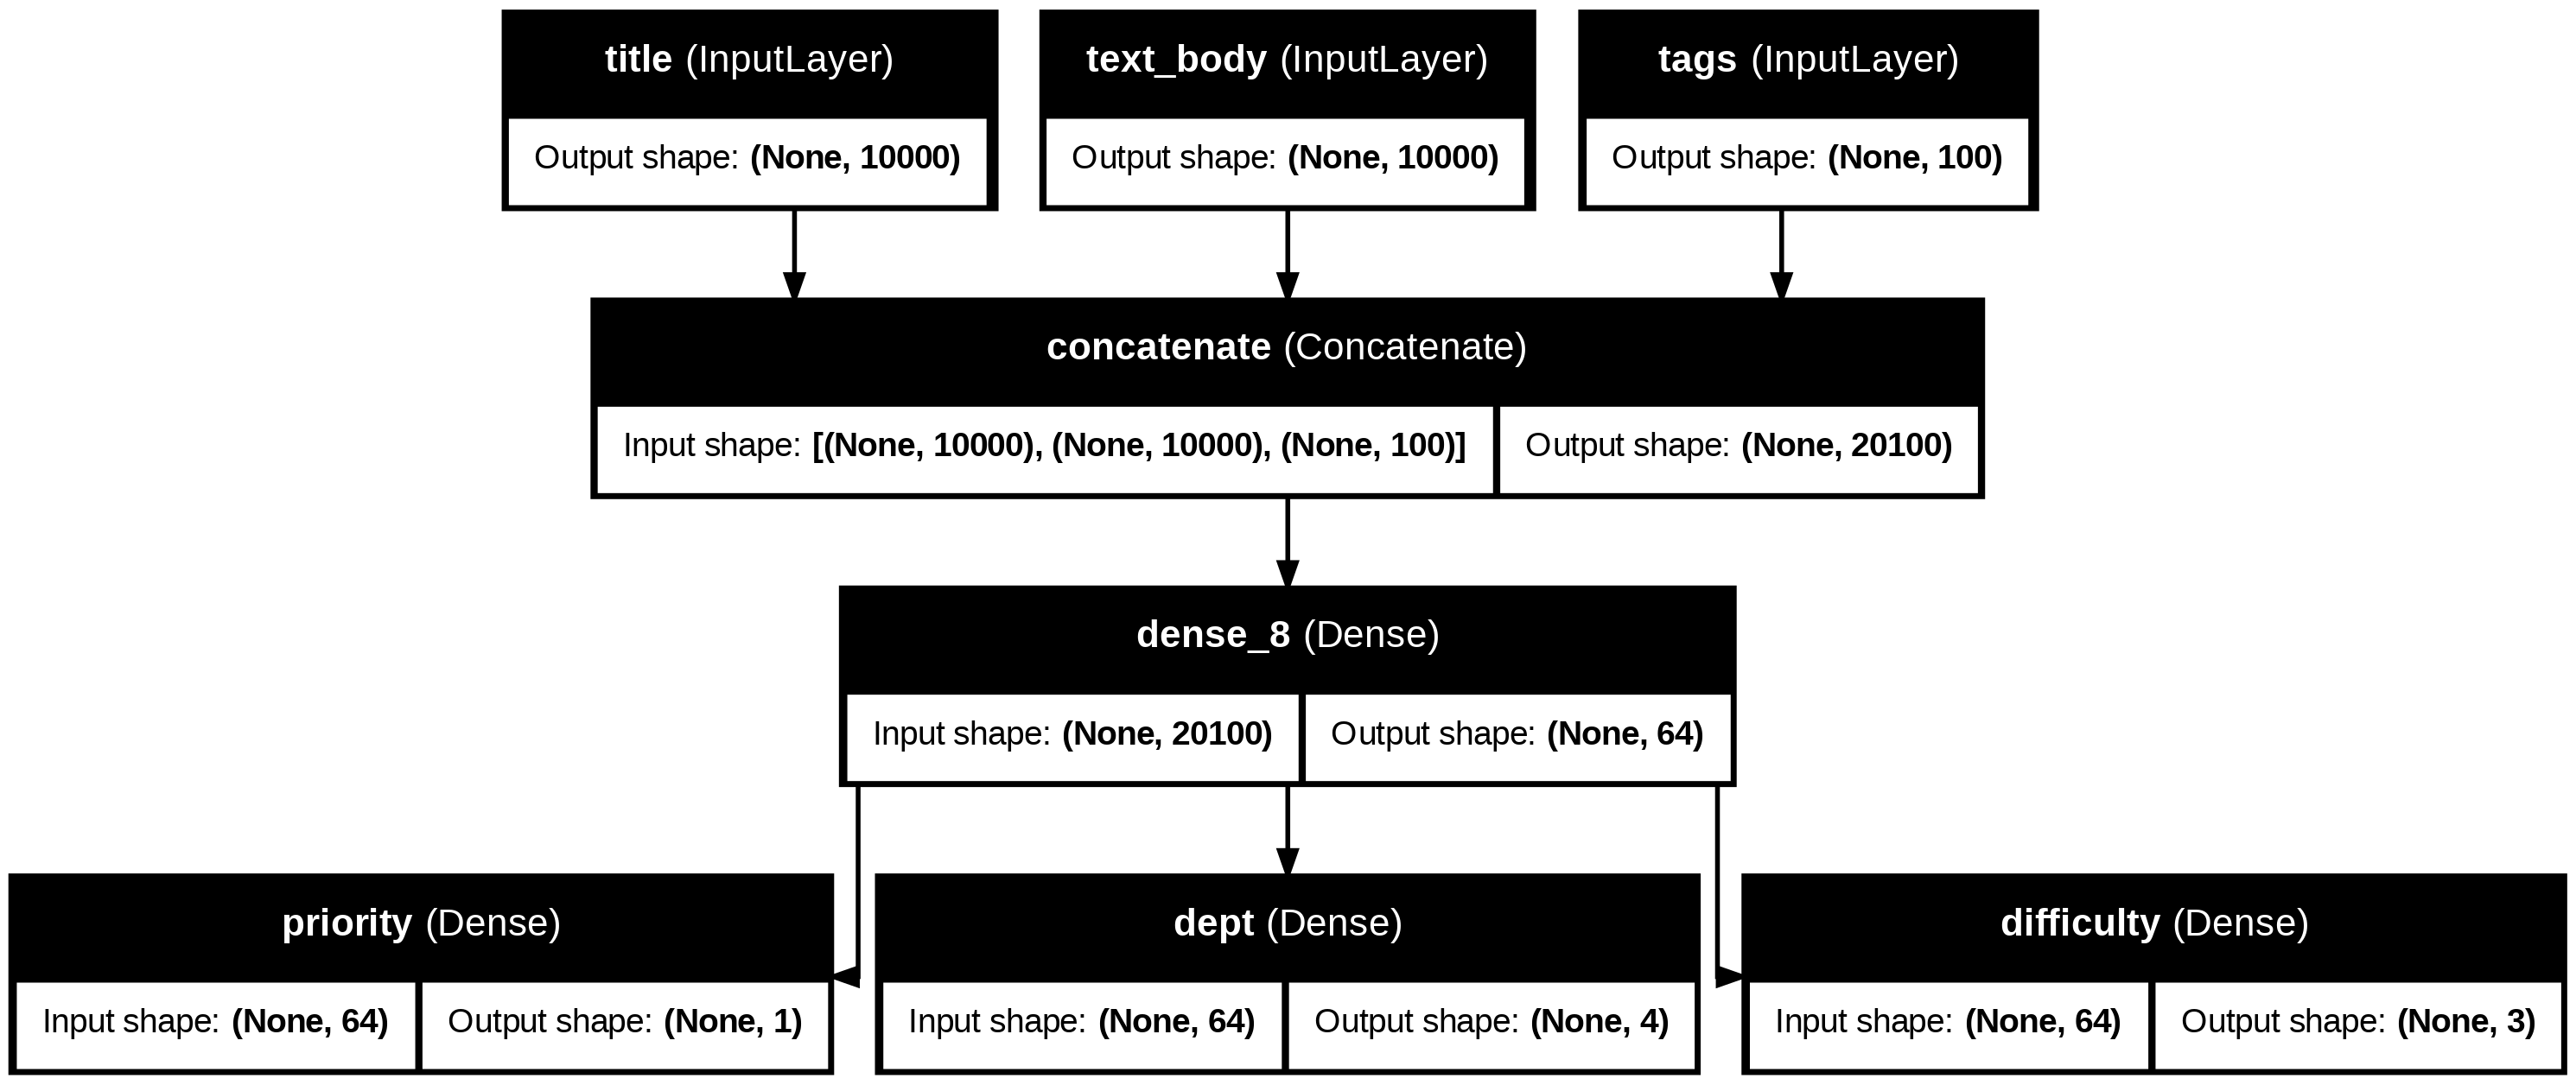

In [21]:
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True, show_layer_names=True)

## 7.2.3 Subclassing the Model class

- The last and the mode advanced model-building pattern.
  - Define layers in the `__init()__` method.
  - Define the forward pass of the model, reusing the layers previously created in the `call()` method.
  - Instantiate your subclass, and call it on data to create its weights.

### A simple subclassed model

Rewriting the customer support model using `Model` subclass.

In [26]:
class CustomerTicketClassifier(keras.Model):
  def __init__(self, num_depts):
    super().__init__()

    # defining sublayers in the constructor
    self.concat_layer = layers.Concatenate()
    self.mixing_layer = layers.Dense(64, activation="relu")
    self.priority_scorer = layers.Dense(1, activation="sigmoid")
    self.department_class = layers.Dense(num_depts, activation="softmax")

    # forward pass in the call method
  def call(self, inputs):
    title = inputs["title"]
    text_body = inputs["text_body"]
    tags = inputs["tags"]

    features = self.concat_layer([title, text_body, tags])
    features = self.mixing_layer(features) # the intermediate layer
    priority = self.priority_scorer(features)
    department = self.department_class(features)

    return priority, department

In [27]:
# instantiate the model, noting that it will only create its weights the first time we call the data on it
model = CustomerTicketClassifier(num_depts=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data}
)

This looks similar to the `Layer` subclass we did earlier. The difference is that a "layer" is a building block we use to create models, and a "model" is the top-level object that we actually train, export for inference, etc.

A `Model` has `fit()`, `evaluate()`, and `predict()` methods. Layers don't. Other than that, the 2 classes are virtually identical.

Compile and train a `Model` subclass just like a Sequential or Functional model:

In [29]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])

model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          [priority_data, dept_data], epochs=1)

model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          [priority_data, dept_data])

priority_preds, dept_preds = model.predict({"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.1692 - categorical_crossentropy_loss: 35.0982 - loss: 35.4123 - mean_absolute_error: 0.4795 - mean_squared_error_loss: 0.3140
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0870 - categorical_crossentropy_loss: 41.6586 - loss: 41.9926 - mean_absolute_error: 0.4997 - mean_squared_error_loss: 0.3341
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


`Model` subclassing workflow is the most flexible way to build a model. Anything is possible to build, we're in charge.

This comes at a cost:

- We are responsible for more of the model logic, and this the potential error surface is much larger.
- As the way the layers are connected to each other is hidden inside the body of the `call()` method, calling `summary()` will not display layer connectivity as we cannot access that information.
- Also cannot plot the model topology via `plot_model()`.
- Cannot access the nodes of the graphs of layers to do feature extraction Once the model is instantiated, its forward pass becomes a complete black box.

## 7.2.4 Mixing and matching different components

All the 3 models can interoperate with each other.

### Creating a Functional model that includes a subclassed model

```python
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)
```



### Creating a subclassed model that includes a Functional model

```python
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()
```

In general, the Functional API provides a pretty good trade-off between
ease of use and flexibility. It also gives direct access to layer connectivity, which is
very powerful for use cases such as model plotting or feature extraction. If our model can be expressed as a directed acyclic graph
of layers—it is recommended to use it over model subclassing.